## Survival Models

In [1]:
import numpy as np   #编辑数据
import pandas as pd  #读表/读数据
import matplotlib.pyplot as plt   #画图
from scipy.optimize import curve_fit  #用Gradient Descent（梯度下降）去优化模型参数

### 1. Proportion of people left at each age

In [2]:
# 注意替换这里的数据，用之前的2015年的数据
data = {
    "Age": np.arange(0, 101, 10),  # Age intervals
    "l(x)": [100000, 95000, 85000, 70000, 50000, 30000, 15000, 5000, 1000, 100, 10]  # Survivors
}
life_table = pd.DataFrame(data)

In [14]:
life_table = pd.read_csv("data\\GBR_male.csv")

In [3]:
life_table

,Age,l(x)
0,0,100000
1,10,95000
2,20,85000
3,30,70000
4,40,50000
5,50,30000
6,60,15000
7,70,5000
8,80,1000
9,90,100


In [4]:
# Calculate proportion of population left at each age (第1题)
life_table['Proportion'] = life_table['l(x)'] / life_table['l(x)'].iloc[0]

life_table

,Age,l(x),Proportion
0,0,100000,1.0000
1,10,95000,0.9500
2,20,85000,0.8500
3,30,70000,0.7000
4,40,50000,0.5000
5,50,30000,0.3000
6,60,15000,0.1500
7,70,5000,0.0500
8,80,1000,0.0100
9,90,100,0.0010


In [5]:
# Define survival functions
def exponential_survival(t, lambd):
    return np.exp(-lambd * t)

def weibull_survival(t, k, lambd):
    return np.exp(-((t / lambd) ** k))

'''def gompertz_survival(t, b, c):
    return np.exp(-b / c * (np.exp(c * t) - 1))'''

'def gompertz_survival(t, b, c):\n    return np.exp(-b / c * (np.exp(c * t) - 1))'

In [7]:
weibull_survival(15, 1.2, 1/0.00328)

np.float64(0.9734220280386499)

In [8]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize._minpack_py:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.

    Assumes ``ydata = f(xdata, *params) + eps``.

    Parameters
    ----------
    f : callable
        The model function, f(x, ...). It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : array_like
        The independent variable where the data is measured.
        Should usually be an M-length sequence or an (k,M)-shaped array for
        functions with k predictors, and each element should be float
        convertible if it is an array like object.
    ydata : array_like
        The dependent data, a length M array - nominally ``f(xdata, ...)``.
    p0 : array_like, optional
       

In [19]:
# Fit the survival functions
ages = life_table['Age']
proportions = life_table['Proportion']

# Fit Exponential
popt_exp, _ = curve_fit(exponential_survival, ages, proportions, p0=(0.01,))

# Fit Weibull
popt_weibull, _ = curve_fit(weibull_survival, ages, proportions, p0=(1.5, 50))

## 

C:\Users\xiang\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


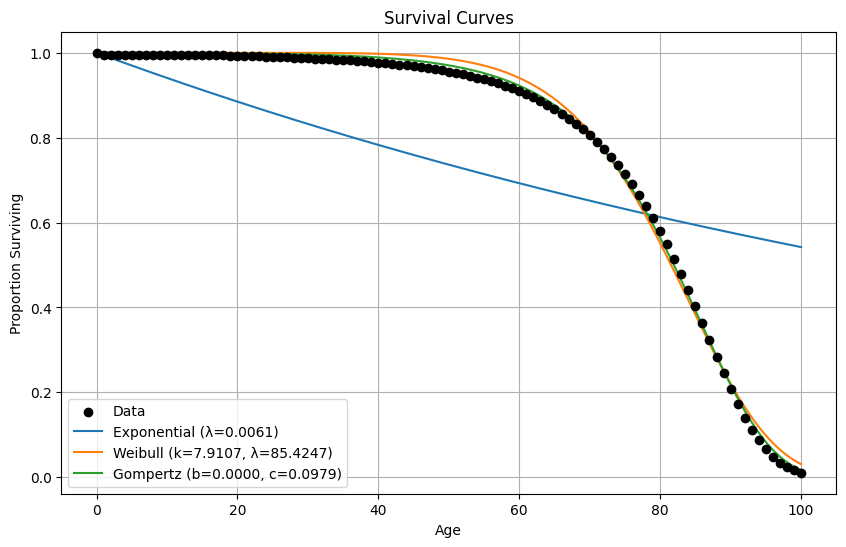

In [20]:
# Generate survival curves
ages_fine = np.linspace(0, max(ages), 500)   # x值
exp_curve = exponential_survival(ages_fine, *popt_exp) # exponential模型下的y值
weibull_curve = weibull_survival(ages_fine, *popt_weibull) # Weibull模型下的y值


# Plot the data and fitted curves
plt.figure(figsize=(10, 6))  # 定图像大小
plt.scatter(ages, proportions, color='black', label='Data', zorder=5)   # 画数据（黑点）
plt.plot(ages_fine, exp_curve, label=f'Exponential (λ={popt_exp[0]:.4f})')  #画exponential模拟数据（蓝线）
plt.plot(ages_fine, weibull_curve, label=f'Weibull (k={popt_weibull[0]:.4f}, λ={popt_weibull[1]:.4f})') #画weibull模拟数据（橘线）


plt.title("Survival Curves")
plt.xlabel("Age")
plt.ylabel("Proportion Surviving")
plt.legend() #图例
plt.grid()  #坐标线
plt.show()
